In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [7]:
testset = pd.read_csv("../testset.csv")
timestamp = testset.timestamp

## Separate year, month, date and time and creating new columns from time stamp
testset['month'] = pd.DatetimeIndex(timestamp).month
testset['year'] = pd.DatetimeIndex(timestamp).year
testset['day'] = pd.DatetimeIndex(timestamp).day
testset['hour'] = pd.DatetimeIndex(timestamp).hour

In [8]:
testset.head()

,pv_id,timestamp,month,year,day,hour
0,9531,2021-04-14 10:45:00,4,2021,14,10
1,9531,2021-10-10 13:00:00,10,2021,10,13
2,9531,2021-01-28 16:45:00,1,2021,28,16
3,9531,2021-05-08 10:00:00,5,2021,8,10
4,9531,2021-05-08 06:45:00,5,2021,8,6


In [9]:
# Convert the pv_id and month columns to numpy arrays and get unique values
pv_ids = np.array(testset.pv_id)
months = np.array(testset.month)
unique_pv_ids = np.unique(pv_ids)
unique_months = np.unique(months)

# Calculate the frequency of data points for each PV ID and month combination
freq_matrix = testset.groupby(['pv_id', 'month']).size().unstack(fill_value=0)


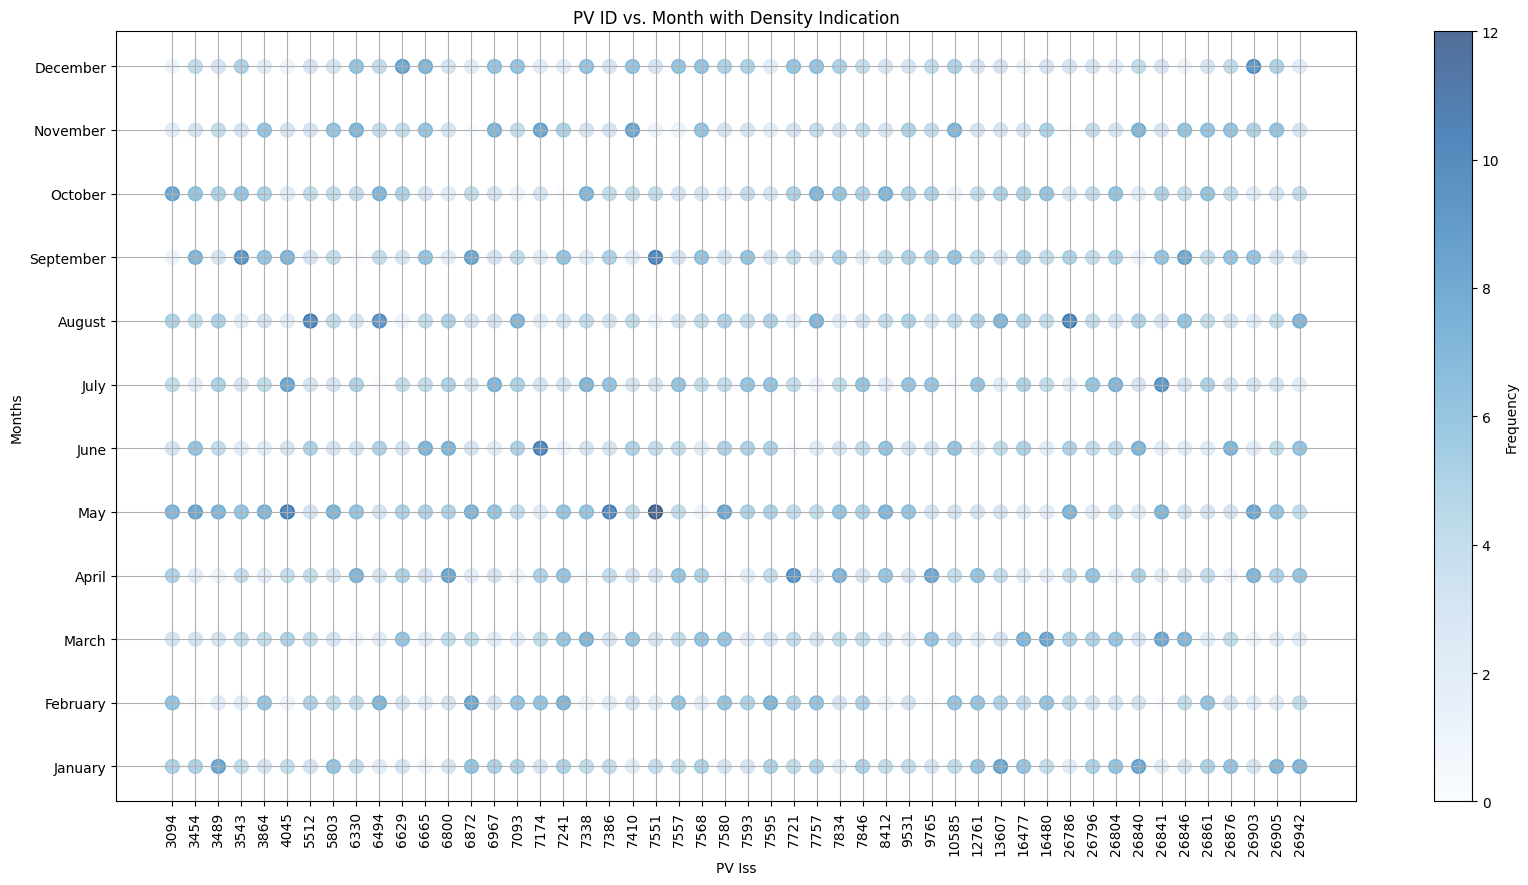

In [10]:
# Prepare data for plotting
x_coords = []
y_coords = []
colors = []  # Store the frequencies for color mapping

for i, pv_id in enumerate(unique_pv_ids):
    for j, month in enumerate(unique_months):

        # Get the frequency of points for the current PV ID and month
        # If a PV ID and month combination doesn't exist in freq_matrix, it defaults to 0 (i.e., no data points)
        freq = freq_matrix.loc[pv_id, month] if (pv_id in freq_matrix.index and month in freq_matrix.columns) else 0
        x_coords.append(i)
        y_coords.append(j)
        colors.append(freq)



# Plot the graph
plt.figure(figsize=(20, 10))
scatter = plt.scatter(x_coords, y_coords, c=colors, cmap='Blues', s=100, alpha=0.7)

plt.xticks(range(len(unique_pv_ids)), unique_pv_ids, rotation='vertical')

# Set the y-ticks to show the month names
month_names = [calendar.month_name[i] for i in unique_months]
plt.yticks(range(len(unique_months)), month_names)

plt.xlabel('PV Iss')
plt.ylabel('Months')
plt.title('PV ID vs. Month with Density Indication')
plt.colorbar(scatter, label='Frequency')
plt.grid(True)
plt.show()